## Install and import all necessary libraries
- pip install python-twitter
- pip install plotly

In [4]:
import twitter
import json
import pandas as pd
import base64
import plotly.plotly as py
from plotly.graph_objs import *

## Get twitter access tokens

Access tokens are like user name and password combined in one long string. This string is used to authenticate a user or application accessing a service (twitter in this case).

Twitter uses OAuth which is an open standard for authorization.

In [5]:
ACCESS_TOKEN = '1103250639751045125-64wei8PVaEYLulCZFwmVOroSY2Uy93'
ACCESS_SECRET = 'wFgbu2tyZn1YEtbvspSJnHHmJHooRy8VN07Cm2WQ52tHj'
CONSUMER_KEY = 'uAdT2XPuukxYg7gR9fCPt8I3Y'
CONSUMER_SECRET = 'HtJllj70PJcghhthESo53wNSWtjVnTjYu1pnNnQTWs1GIoArA0'

## Setup twitter api using python

In [6]:
api = twitter.Api(consumer_key=CONSUMER_KEY,
                  consumer_secret=CONSUMER_SECRET,
                  access_token_key=ACCESS_TOKEN,
                  access_token_secret=ACCESS_SECRET)
print(api.VerifyCredentials())

{"created_at": "Wed Mar 06 11:07:04 +0000 2019", "default_profile": true, "default_profile_image": true, "id": 1103250639751045125, "id_str": "1103250639751045125", "lang": "en", "name": "Parv Jain", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "parv_16"}


## Twitter Python API twitter-python
- Detailed documentation [link](https://python-twitter.readthedocs.io/en/latest/)
    
## Analyze the tweets
- Get the number of positive/ neutral and negative tweets
- Draw bar chart and analyze the numbers
    
## Install the libraries required for sentiment analysis
- pip install textblob
- python -m textblob.download_corpora

TextBlob is actually a high level library built over top of NLTK library. First we call clean_tweet method to remove links, special characters, etc. from the tweet using some simple regex. Then, as we pass tweet to create a TextBlob object, following processing is done over text by textblob library:

Tokenize the tweet ,i.e split words from body of text. Remove stopwords from the tokens.(stopwords are the commonly used words which are irrelevant in text analysis like I, am, you, are, etc.) Do POS( part of speech) tagging of the tokens and select only significant features/tokens like adjectives, adverbs, etc. Pass the tokens to a sentiment classifier which classifies the tweet sentiment as positive, negative or neutral by assigning it a polarity between -1.0 to 1.0 . Here is how sentiment classifier is created:

TextBlob uses a Movies Reviews dataset in which reviews have already been labelled as positive or negative. Positive and negative features are extracted from each positive and negative review respectively. Training data now consists of labelled positive and negative features. This data is trained on a Naive Bayes Classifier. Then, we use sentiment.polarity method of TextBlob class to get the polarity of tweet between -1 to 1. Then, we classify polarity as:

- positive
- negative
- neutral

In [11]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
def get_min_max(tweets):
    ids = []
    for tweet in tweets:
        # print tweet
        if type(tweet) is list:
            tweet = tweet[0]
        ids.append(tweet.id)
    min_id = min(ids)
    max_id = max(ids)
    return min_id, max_id
    
def get_tweets(term, count):
    all_tweets = []
    max_id = 843567375765159939000000
    #print max_id
    loop_count = int(count / 100)
    for i in range(loop_count):
        tweets = api.GetSearch(term=term, count = 100)
        #print 'Total number of tweets found - '  +  str(len(tweets))
        try:
            min_id, max_id = get_min_max(tweets)
            all_tweets = all_tweets + tweets
        except:
            print('something wrong')
            pass
    return all_tweets
  

def get_tweets_df(tweets):
    result = []
    for tweet in tweets:
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        source = tweet.source
        text = tweet.text
        urls = tweet.urls
        sentiment = get_tweet_sentiment(text)
        
        result.append({
            #'text': base64.b64encode(text.encode('ascii', 'ignore').decode('ascii')),
            'text': text.encode('ascii', 'ignore').decode('ascii'),
            'sentiment': sentiment,
            'favorite_count' : favorite_count,
            'source' : source,
            'retweet_count' : retweet_count,
            'user_fav_count': tweet.user.favourites_count,
            'user_follower_count': tweet.user.followers_count,
            'user_friends_count': tweet.user.friends_count,
            'user_screen_name' : tweet.user.screen_name.encode('ascii', 'ignore').decode('ascii'),
            'user_name': tweet.user.name.encode('ascii', 'ignore').decode('ascii'),
            'user_url': tweet.user.url
        })
    result_df = pd.DataFrame(result)
    return result_df

def print_tweet(tweet):
    print('---- Printing tweet ----')
    print(tweet.favorite_count)
    print(tweet.text)
    print(' --------- x --------- ')

## Fetch tweets for different political personalities

In [21]:
print('Fetching tweets for Yogi')
tweets_yogi = get_tweets('Yogi Adityanath', 1000)
print('Total number of tweets fetched = ' + str(len(tweets_yogi)))

print('Fetching tweets for NAMO')
tweets_namo = get_tweets('Narendra Modi', 1000)
print('Total number of tweets fetched = ' + str(len(tweets_namo)))

print('Fetching tweets for AK')
tweets_ak = get_tweets('Arvind Kejriwal', 1000)
print('Total number of tweets fetched = ' + str(len(tweets_ak)))

print('Fetching tweets for RG')
tweets_rg = get_tweets('Rahul Gandhi', 1000)
print('Total number of tweets fetched = ' + str(len(tweets_rg)))
#print tweets

Fetching tweets for Yogi
Total number of tweets fetched = 1000
Fetching tweets for NAMO
Total number of tweets fetched = 1000
Fetching tweets for AK
Total number of tweets fetched = 1000
Fetching tweets for RG
Total number of tweets fetched = 1000


## Convert dicts into pandas data frame

In [22]:
df_yogi = get_tweets_df(tweets_yogi)
df_namo = get_tweets_df(tweets_namo)
df_ak = get_tweets_df(tweets_ak)
df_rg = get_tweets_df(tweets_rg)

df_yogi.to_csv('yogi.csv')
df_namo.to_csv('namo.csv')
df_ak.to_csv('ak.csv')
df_rg.to_csv('rg.csv')

In [23]:
df_yogi.head(5)

,favorite_count,retweet_count,sentiment,source,text,user_fav_count,user_follower_count,user_friends_count,user_name,user_screen_name,user_url
0,1981,296,positive,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",UP CM Yogi Adityanath: More than 3200 NRIs too...,0,134468,0,ANI UP,ANINewsUP,https://t.co/cFcHWKpY59
1,417,176,neutral,"<a href=""https://about.twitter.com/products/tw...",Yogi Adityanath Government Demolishes Urdu Gat...,575,98350,668,Swarajya,SwarajyaMag,http://t.co/3WYSd8k9BS
2,296,75,neutral,"<a href=""http://twitter.com/download/iphone"" r...",DGP UP OP Singh being felicitated by Honble Go...,1066,10295,21,Kumbh Mela Police UP 2019,kumbhMelaPolUP,https://t.co/majcp2NSUM
3,0,38,negative,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @SwarajyaMag: Yogi Adityanath Government De...,55197,504,401,Krishnaswamy,kristanjore,None
4,0,38,negative,"<a href=""http://twitter.com/download/android"" ...",RT @SwarajyaMag: Yogi Adityanath Government De...,42424,258,174,Prasanna Srinivasan,prasanna4swaraj,None


In [24]:
# Visualize some tweets
print('Yogi Adityanath positive tweets')
print(df_yogi[df_yogi['sentiment'] == 'positive']['text'].head())

print('Yogi Adityanath negative tweets')
print(df_yogi[df_yogi['sentiment'] == 'negative']['text'].head())


Yogi Adityanath positive tweets
0     UP CM Yogi Adityanath: More than 3200 NRIs too...
10    RT @ANINewsUP: UP CM Yogi Adityanath: More tha...
11    RT @ANINewsUP: UP CM Yogi Adityanath: More tha...
49    RT @masakadzas: 47 days, 24 cr people visiting...
60    RT @ANINewsUP: UP CM Yogi Adityanath: More tha...
Name: text, dtype: object
Yogi Adityanath negative tweets
3     RT @SwarajyaMag: Yogi Adityanath Government De...
4     RT @SwarajyaMag: Yogi Adityanath Government De...
6     RT @SwarajyaMag: Yogi Adityanath Government De...
7     RT @SwarajyaMag: Yogi Adityanath Government De...
12    Yogi Adityanath Government Demolishes Urdu Gat...
Name: text, dtype: object


## Analyze the final stats
- Get the number of positive/ neutral and negative tweets
- Draw bar chart and analyze the numbers

           YOGI  NAMO   AK   RG
sentiment                      
negative    370    20   50  117
neutral     570   715  710  440
positive     60   265  240  443


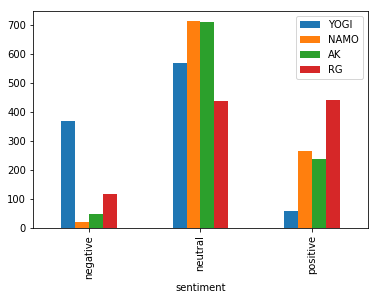

In [25]:
sentiment_yogi = df_yogi.groupby(['sentiment'])[['sentiment']].count()
sentiment_yogi.rename(columns={'sentiment': 'YOGI'}, inplace=True)

sentiment_namo = df_namo.groupby(['sentiment'])[['sentiment']].count()
sentiment_namo.rename(columns={'sentiment': 'NAMO'}, inplace=True)

sentiment_ak = df_ak.groupby(['sentiment'])[['sentiment']].count()
sentiment_ak.rename(columns={'sentiment': 'AK'}, inplace=True)

sentiment_rg = df_rg.groupby(['sentiment'])[['sentiment']].count()
sentiment_rg.rename(columns={'sentiment': 'RG'}, inplace=True)

#Concatenate the results df
stats = pd.concat([sentiment_yogi, sentiment_namo, sentiment_ak, 
                   sentiment_rg] ,axis=1, join='inner')
print(stats)

%matplotlib inline
stats.plot(kind='bar')